# **4 Urban analysis exercise**

In this exercise we will study multiple aspects that can influence the urban heat island (UHI) intensity for your particular urban meteorological network. Before you start this excercise it is crusial that your dataset has undergone quality control (QC) and that possible datagaps have been gap-filled. When this is not the case, please go first over the following exercises:

[Excercise on QC](https://colab.research.google.com/drive/1s5vioY3RxYT89Jj7a7KqwfTUObRxq4V3?usp=sharing)

[Excercise on gap-filling](https://colab.research.google.com/drive/1wJ4G3BnHJgwMQEnIDKx5wQJIl4vTBZGq?usp=sharing)



### **4.0 Installing packages and importing a clean dataset**

In [ ]:
#!pip3 install metobs-toolkit==0.0.2a5
!pip3 install MetObs-toolkit==0.1.1
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

  Cloning https://github.com/vergauwenthomas/MetObs_toolkit to /tmp/pip-req-build-aqc4fdd1
  Running command git clone --filter=blob:none --quiet https://github.com/vergauwenthomas/MetObs_toolkit /tmp/pip-req-build-aqc4fdd1
  Resolved https://github.com/vergauwenthomas/MetObs_toolkit to commit 285bfe7823d0dc081804cb474df365feeef6416d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import pandas as pd
import metobs_toolkit
from datetime import datetime

Importing meteorological dataset with hourly values that underwent the QC and gap-filling.

In [ ]:
# Import Vlinder data. Use this if you do not have a dataset.
# Do not run this code block, but the following block if you want to work with
# your own data set.
datafile = metobs_toolkit.demo_datafile
data = pd.read_csv(datafile, sep=';')

print(data.head()) # take a look at the data

        Datum Tijd (UTC)  Temperatuur  Vochtigheid  Luchtdruk  \
0  2022-09-01   00:00:00         18.8           65     101739   
1  2022-09-01   00:05:00         18.8           65     101731   
2  2022-09-01   00:10:00         18.8           65     101736   
3  2022-09-01   00:15:00         18.7           65     101736   
4  2022-09-01   00:20:00         18.7           65     101733   

   Neerslagintensiteit  Neerslagsom  Windrichting  Windsnelheid  Rukwind  \
0                  0.0          0.0            65           5.6     11.3   
1                  0.0          0.0            75           5.5     12.9   
2                  0.0          0.0            75           5.1     11.3   
3                  0.0          0.0            85           6.0     12.9   
4                  0.0          0.0            65           5.0     11.3   

   Luchtdruk_Zeeniveau  Globe Temperatuur    Vlinder  
0             102005.0                NaN  vlinder01  
1             101997.0                NaN 

In [ ]:
# Importing your own dataset

# Connect with your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# OPEN THE .pkl FILE THAT YOU OPTAINED AFTER FINISHING THE GAP FILLING EXERCISE
# COPY HERE THE CODE TO LOAD YOUR OWN DATA FLIE
# (You can also use the code produced by the prompt of the introduction exercise)




INFO:metobs_toolkit.dataset:Initialise dataset
INFO:metobs_toolkit.settings:Initialising settings
DEBUG:metobs_toolkit.settings:Updating Database settings.
DEBUG:metobs_toolkit.settings:Updating time resolution settings.
DEBUG:metobs_toolkit.settings:Updating app settings.
DEBUG:metobs_toolkit.settings:Updating QC settings.
DEBUG:metobs_toolkit.settings:Updating gap settings.
DEBUG:metobs_toolkit.settings:Updating data templates settings.
DEBUG:metobs_toolkit.settings:Updating gee settings.
DEBUG:metobs_toolkit.settings:Updating gee settings.
INFO:metobs_toolkit.settings:Updating settings with input: 
INFO:metobs_toolkit.settings:Update output_folder:  None  -->  /content/drive/MyDrive/FAIRNESS_summerschool_23
INFO:metobs_toolkit.settings:Update input_data_file:  None  -->  /content/drive/MyDrive/FAIRNESS_summerschool_23/Vlinder_2022_Ghent.csv
INFO:metobs_toolkit.settings:Update meta_data_file:  None  -->  /content/drive/MyDrive/FAIRNESS_summerschool_23/Meta_vlinder_Ghent.csv
INFO:meto

Mounted at /content/drive


INFO:metobs_toolkit.data_import:The following columns are not present in the data, and cannot be mapped: ['network']
INFO:metobs_toolkit.data_import:The following columns in the data cannot be mapped with the template: ['call_name', 'location'].
DEBUG:metobs_toolkit.dataset:Data from /content/drive/MyDrive/FAIRNESS_summerschool_23/Vlinder_2022_Ghent.csv                      imported to dataframe.
INFO:metobs_toolkit.dataset:Importing metadata from file:                        /content/drive/MyDrive/FAIRNESS_summerschool_23/Meta_vlinder_Ghent.csv
INFO:metobs_toolkit.data_import:The following columns are not present in the metadata, and cannot be mapped: ['temp', 'humidity', 'pressure', 'precip', 'precip_sum', 'wind_direction', 'wind_speed', 'wind_gust', 'pressure_at_sea_level', 'radiation_temp']
DEBUG:metobs_toolkit.dataset:Merging metadata (['network'])                             to dataset data by name.
INFO:metobs_toolkit.dataset:Updating dataset by dataframe with shape:            

In [ ]:
# Coarsening time resolution of the dataset to hourly data
# ONLY DO THIS WHEN YOUR DATA DOES NOT HAVE AN HOURLY RESOLUTION YET!
your_dataset.coarsen_time_resolution(freq='1H')
#your_dataset

INFO:metobs_toolkit.dataset:Coarsening the timeresolution to 1H using                     the nearest-method (with limit=1).


### **4.1 Creating basic graphs and perform basic statistics to interpret the data**

**4.1.1 The annual cycle**

The annual cycle can give you some insights on how the meteorological variables (temperature, humidity, wind speed...) fluctuate over a full year. In case of temperature you can see which station is the coldest/warmest for which month. This kind of visualisation is only meaningfull for datasets that comprise at least one season. If you have a short data set e.g. some days or weeks, then you can skip this section and move on to the section about the diurnal cycle.

In [ ]:
# Create Analysis instance
# (this is needed to save the statistics that you will calculate,
# see the documentation page for more info)
ann_analysis = your_dataset.get_analysis()
ann_analysis

Analysis instance containing: 
     *6 stations 
     *['temp', 'radiation_temp', 'humidity', 'precip', 'precip_sum', 'wind_speed', 'wind_gust', 'wind_direction', 'pressure', 'pressure_at_sea_level'] observation types 
     *52278 observation records 
     *Coordinates are available for all stations. 
 
     *records range: 2022-01-01 00:00:00+00:00 --> 2023-01-01 00:00:00+00:00 (total duration:  365 days 00:00:00)     *Coordinates are available for all stations. 

name       vlinder01  vlinder02  vlinder05  vlinder27  vlinder28  vlinder29
month                                                                      
January     4.549664   4.906040   4.904698   5.393557   4.924698   5.270470
February    6.951935   7.355208   7.329911   7.622768   7.319048   7.496280
March       7.735935   9.000269   7.597039   9.529879   7.663930   8.596501
April      10.036528  10.831667  10.794444  11.568889   9.512083  10.694444
May        14.756855  15.347312  15.823253  16.368414  14.808468  15.558602
June       17.507371  18.205146  18.237830  19.096662  17.425174  18.275104
July       19.103004  20.069242  20.707010  21.018455  18.288555  19.982260
August     20.571774  21.573790  22.026478  22.543683  20.313978  21.431855
September  14.939167  15.336250  17.300694  16.101528  14.580833  15.528611
October    14.272678  14.562988  14.238223  15.007537  13.846299  14.600942
November    8.888056   9.659306   8.453194   9.493889   9.302083   9.296389
December    3.803629   9.800000   4.948387   4.747177   4.175000   4.536962

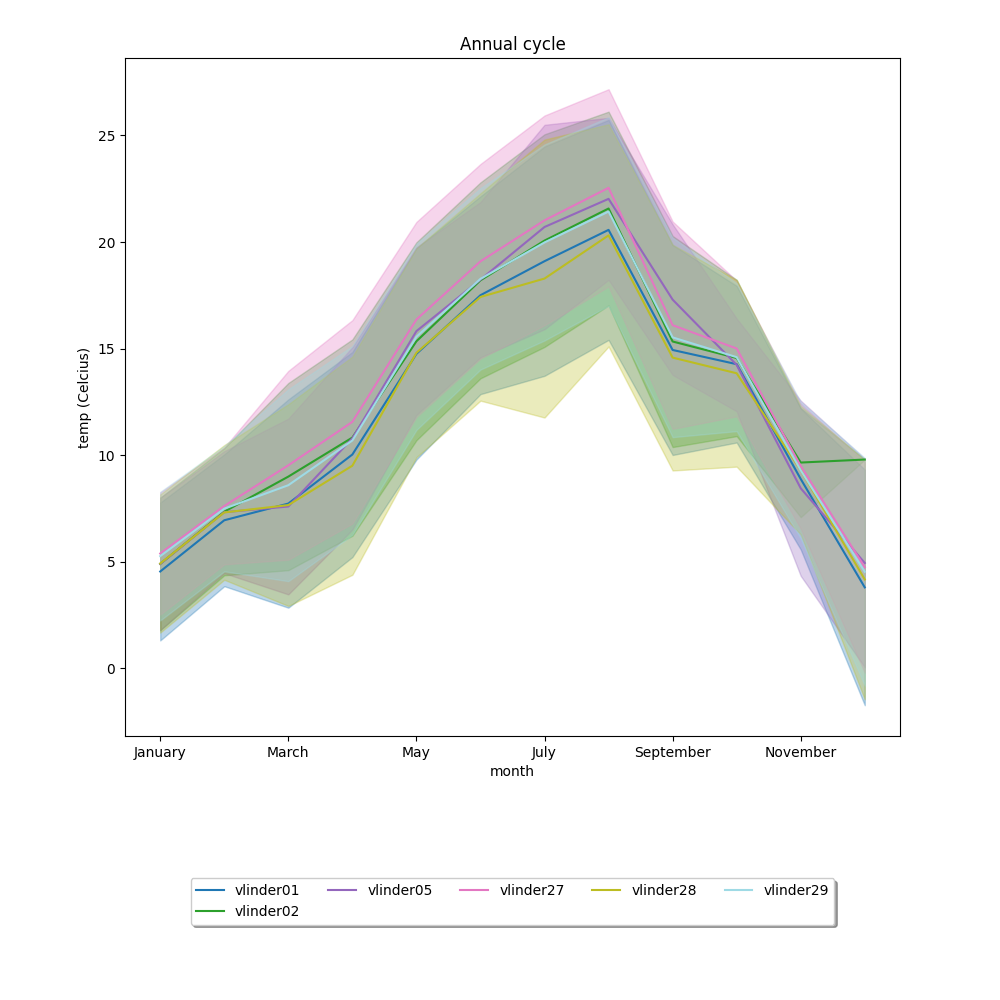

In [ ]:
# Compute mean annual cycle for each station + plot
ann_mean_df = ann_analysis.get_anual_statistics(groupby=['name'], #each curve represents a station
                                                obstype='temp', # variable that is studied is temperature
                                                agg_method='mean', #value of the line is the mean of the month
                                                stations=None, #use all stations
                                                startdt=None, #use the full analysis
                                                enddt=None, #use the full analysis
                                                plot=True,
                                                errorbands=True, #Display the std as a band
                                                title = "Annual cycle",
                                                )
# Print a table with the information about the montly means
ann_mean_df

Look at the differences between the stations and try to explain it based on your knowledge of the measurement network. Are some locations behaving differently over the different seasons? Or in other words does the order of the stations change during the year? What could be the reason for this?

In [ ]:
# EXTRA: You can compute aggregated dataframes yourself using the aggregate_df() method.
# Here is a demonstration for the anual cycle:
aggregated_df = ann_analysis.aggregate_df(df=None, #use all records of the analysis
                                          # Most common aggregation schemes have a time-component AND
                                          # a variable distinguishing stations (by name, LCZ, height, ...)
                                          agg=['month', 'name'],
                                          method=['mean', 'std'])
aggregated_df


temp             humidity               precip  \
                          mean       std       mean        std      mean   
month     name                                                             
April     vlinder01  10.036528  4.809733  74.286111  14.787181  0.002778   
          vlinder02  10.831667  4.603155  69.477778  15.313218  0.003611   
          vlinder05  10.794444  4.277303  68.955556  13.864563  0.014444   
          vlinder27  11.568889  4.771068  65.333333  15.855923  0.003611   
          vlinder28   9.512083  5.115868  75.401389  15.700562  0.003056   
...                        ...       ...        ...        ...       ...   
September vlinder02  15.336250  4.950029  82.333333  14.645557  0.013056   
          vlinder05  17.300694  3.532903  84.411111  12.068437  0.003056   
          vlinder27  16.101528  4.862732  77.309722  14.866487  0.010278   
          vlinder28  14.580833  5.292932  83.631944  13.139006  0.003056   
          vlinder29  15.528611  4.678009  80.600000  13.984434  0.000833   

                              wind_speed            wind_gust            \
                          std       mean       std       mean       std   
month     name                                                            
April     vlinder01  0.023422   8.057361  5.832540  13.517361  9.368245   
          vlinder02  0.048777   3.865417  3.341393  10.446528  7.399411   
          vlinder05  0.100137   5.328472  4.448245  11.624583  9.214638   
          vlinder27  0.028661   1.666389  1.642324   5.269444  4.206722   
          vlinder28  0.026718   4.562083  5.899373   9.036944  9.869283   
...                       ...        ...       ...        ...       ...   
September vlinder02  0.078912   1.631667  1.882545   5.327222  4.939141   
          vlinder05  0.024548   0.856806  1.991039   2.520972  4.036401   
          vlinder27  0.044189   0.643750  0.849488   2.852778  2.854164   
          vlinder28  0.024548   3.084861  3.691268   6.191111  6.550158   
          vlinder29  0.012892   2.431806  2.506193   5.561528  5.012303   

                    wind_direction                   pressure               
                              mean         std           mean          std  
month     name                                                              
April     vlinder01     130.305556  109.119199  101283.695833  1008.157327  
          vlinder02     141.694444  101.922635  101676.100000  1011.138203  
          vlinder05     156.416667  104.727974  101455.462500  1011.498954  
          vlinder27     205.402778  103.402364  101647.137500  1012.381211  
          vlinder28     140.041667  120.514652  101488.452778  1005.986776  
...                            ...         ...            ...          ...  
September vlinder02     198.500000   92.152290  101451.036111   694.562777  
          vlinder05     129.333333   73.413494  100896.572222   503.741705  
          vlinder27     192.152778   96.483824  101430.613889   698.783275  
          vlinder28     181.583333  101.223358  101396.493056   698.598384  
          vlinder29     200.361111  101.892428  101407.950000   699.173367  

[72 rows x 14 columns]

In [ ]:
#(advanced) If you want to subset the mean values, then run this command.
# (You can do the same for the standard deviation by specifying 'std' instead of 'mean'.)

aggregated_df.xs('mean',
                 level=1, #level 0 (top level) are the observation types
                 axis='columns')


temp   humidity    precip  wind_speed  wind_gust  \
month     name                                                               
April     vlinder01  10.036528  74.286111  0.002778    8.057361  13.517361   
          vlinder02  10.831667  69.477778  0.003611    3.865417  10.446528   
          vlinder05  10.794444  68.955556  0.014444    5.328472  11.624583   
          vlinder27  11.568889  65.333333  0.003611    1.666389   5.269444   
          vlinder28   9.512083  75.401389  0.003056    4.562083   9.036944   
...                        ...        ...       ...         ...        ...   
September vlinder02  15.336250  82.333333  0.013056    1.631667   5.327222   
          vlinder05  17.300694  84.411111  0.003056    0.856806   2.520972   
          vlinder27  16.101528  77.309722  0.010278    0.643750   2.852778   
          vlinder28  14.580833  83.631944  0.003056    3.084861   6.191111   
          vlinder29  15.528611  80.600000  0.000833    2.431806   5.561528   

                     wind_direction       pressure  
month     name                                      
April     vlinder01      130.305556  101283.695833  
          vlinder02      141.694444  101676.100000  
          vlinder05      156.416667  101455.462500  
          vlinder27      205.402778  101647.137500  
          vlinder28      140.041667  101488.452778  
...                             ...            ...  
September vlinder02      198.500000  101451.036111  
          vlinder05      129.333333  100896.572222  
          vlinder27      192.152778  101430.613889  
          vlinder28      181.583333  101396.493056  
          vlinder29      200.361111  101407.950000  

[72 rows x 7 columns]

**4.1.2 Seasonal statistics**

In the previous section it was maybe hard to tell something because the lines were very close to eachother for the different stations. To have a closer look you can zoom in on one or multiple seasons. This can be done by selecting a period in the `get_anual_statistics()` function.



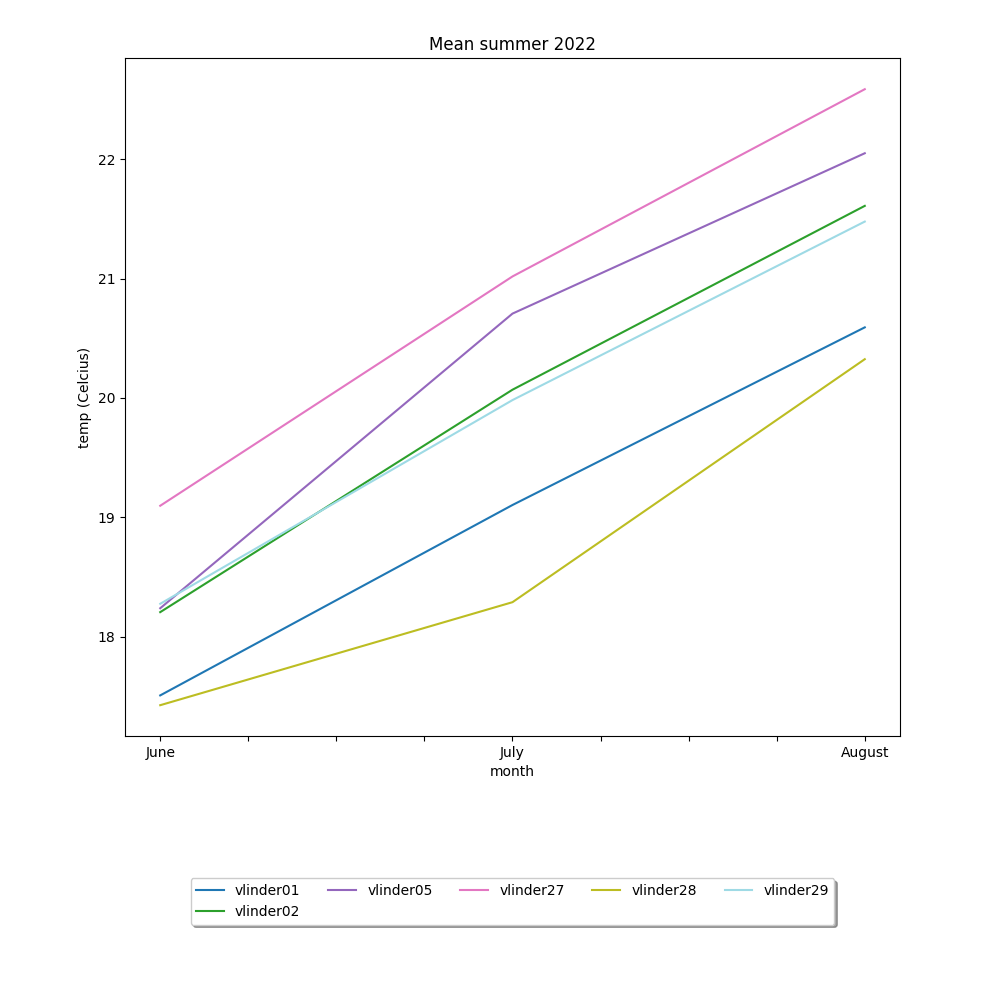

In [ ]:
# Compute mean monthly values for the 2022 summer season for each station + plot
# Change startdt and enddt if your dataset covers a different year
summer_mean_df = ann_analysis.get_anual_statistics(groupby=['name'], #each line represents a station
                                                obstype='temp', # on temperatures
                                                agg_method='mean', #value of the line is the means of the aggregation
                                                stations=None, #use all stations
                                                startdt=datetime(2022,6,1), #use 2022 summer season (June, July, August)
                                                enddt=datetime(2022,8,31), #use summer season (June, July, August)
                                                plot=True,
                                                errorbands=False, #Display the std as a band
                                                title = "Mean summer 2022",
                                                )

To be able to investigate differences at seasonal level you can calculate for every season the mean and standard deviation for every measurement location.

In [ ]:
# Calculating seasonal means for every location
season_mean_df = ann_analysis.aggregate_df(df=None, agg=['season', 'name'], method='mean')

# Calculating standard deviation for every location per season
season_std_df = ann_analysis.aggregate_df(df=None, agg=['season', 'name'], method='std')

# Export table with this information
season_mean_df
#season_std_df

temp   humidity    precip  wind_speed  wind_gust  \
season name                                                               
autumn vlinder01  12.716537  87.095282  0.006780    6.951809  11.681448   
       vlinder02  13.200687  85.229043  0.007055    2.468255   7.461109   
       vlinder05  13.340266  84.874485  0.001008    2.795282   6.048969   
       vlinder27  13.549840  81.671553  0.006138    0.827439   3.476592   
       vlinder28  12.589785  85.735227  0.002749    5.974256  10.305955   
       vlinder29  13.157352  84.005955  0.001191    4.105268   8.298259   
spring vlinder01  10.853285  74.734481  0.005437    6.574082  11.331581   
       vlinder02  11.737381  69.784776  0.001994    3.185999   8.733348   
       vlinder05  11.413276  67.046217  0.006253    4.800362   9.878070   
       vlinder27  12.500408  65.232895  0.002537    1.304894   4.404803   
       vlinder28  10.675351  73.164024  0.001178    4.091346   7.811509   
       vlinder29  11.627911  69.950159  0.001994    4.247259   8.512234   
summer vlinder01  19.077798  73.671600  0.002868    4.584366   8.732609   
       vlinder02  19.967068  69.150324  0.004440    2.508418   7.283071   
       vlinder05  20.339917  66.287234  0.006383    2.502035   6.360083   
       vlinder27  20.904209  63.786772  0.003053    0.835060   3.379140   
       vlinder28  18.698427  72.216004  0.000833    2.966235   6.281961   
       vlinder29  19.913367  68.723404  0.002405    2.644773   6.335708   
winter vlinder01   5.039843  88.398889  0.006016    9.195373  15.197362   
       vlinder02   7.352568  87.921795  0.049232    3.060157   8.769088   
       vlinder05   5.673901  83.950949  0.073572    5.981953  11.834845   
       vlinder27   5.864230  84.645534  0.051638    1.663859   5.422721   
       vlinder28   5.411152  87.124479  0.068297    8.348959  14.127117   
       vlinder29   5.710088  85.806571  0.050157    6.240629  11.659648   

                  wind_direction       pressure  
season name                                      
autumn vlinder01      187.459918  101154.769125  
       vlinder02      219.370133  101489.189189  
       vlinder05      150.817682  101146.604672  
       vlinder27      195.769583  101499.094366  
       vlinder28      199.759505  101453.428310  
       vlinder29      178.875401  101473.657810  
spring vlinder01      143.010874  101662.869506  
       vlinder02      154.714545  102053.731763  
       vlinder05      167.990485  101880.797916  
       vlinder27      193.536475  102028.832352  
       vlinder28      138.819665  101954.173992  
       vlinder29      181.633439  102007.925691  
summer vlinder01      146.720629  101580.439870  
       vlinder02      165.675301  101927.308973  
       vlinder05      187.155412  101767.838113  
       vlinder27      182.789084  101915.775671  
       vlinder28      145.610546  101889.277983  
       vlinder29      201.452359  101900.098520  
winter vlinder01      207.762610  101645.602499  
       vlinder02      233.577048  101967.685794  
       vlinder05      215.812124  101761.708006  
       vlinder27      184.775567  102037.006478  
       vlinder28      212.068487  101996.760296  
       vlinder29      186.968996  102000.409533

Instead of plotting monthly means, you can also visualize the seasonal temperatures by subsetting for a season in the `make_plot()` function. In this way you can study fluctuations of the measurements within a particular season.

INFO:metobs_toolkit.dataset:Make temp-timeseries plot for all stations


<Axes: title={'center': 'summer 2022'}, ylabel='temp'>

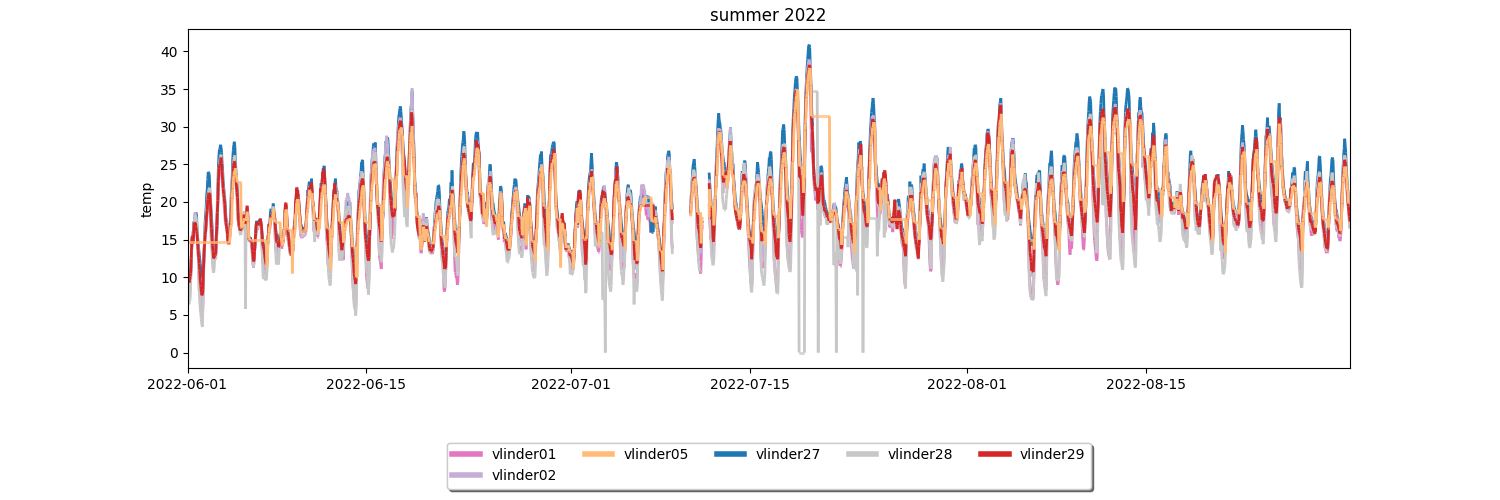

In [ ]:
# Plot values for the 2022 summer season for each station
# Change startdt and enddt if your dataset covers a different year
# or if you want to investigate a different season.
your_dataset.make_plot(obstype='temp',
                        colorby='name',
                        starttime=datetime(2022,6,1),
                        endtime=datetime(2022,8,31),
                        title='summer 2022',
                        legend=True
                        )

Look at the differences between the stations and try to explain it based on your knowledge of the measurement network. Are some locations behaving differently over the different seasons or within a season? What could be the reason for this?

**4.1.3 The diurnal cycle**


The diurnal cycle can give you some insights on how the meteorological variables (temperature, humidity, wind speed...) fluctuate during the day. In case of temperature you can see which station is on average the coldest/warmest for which time of the day.

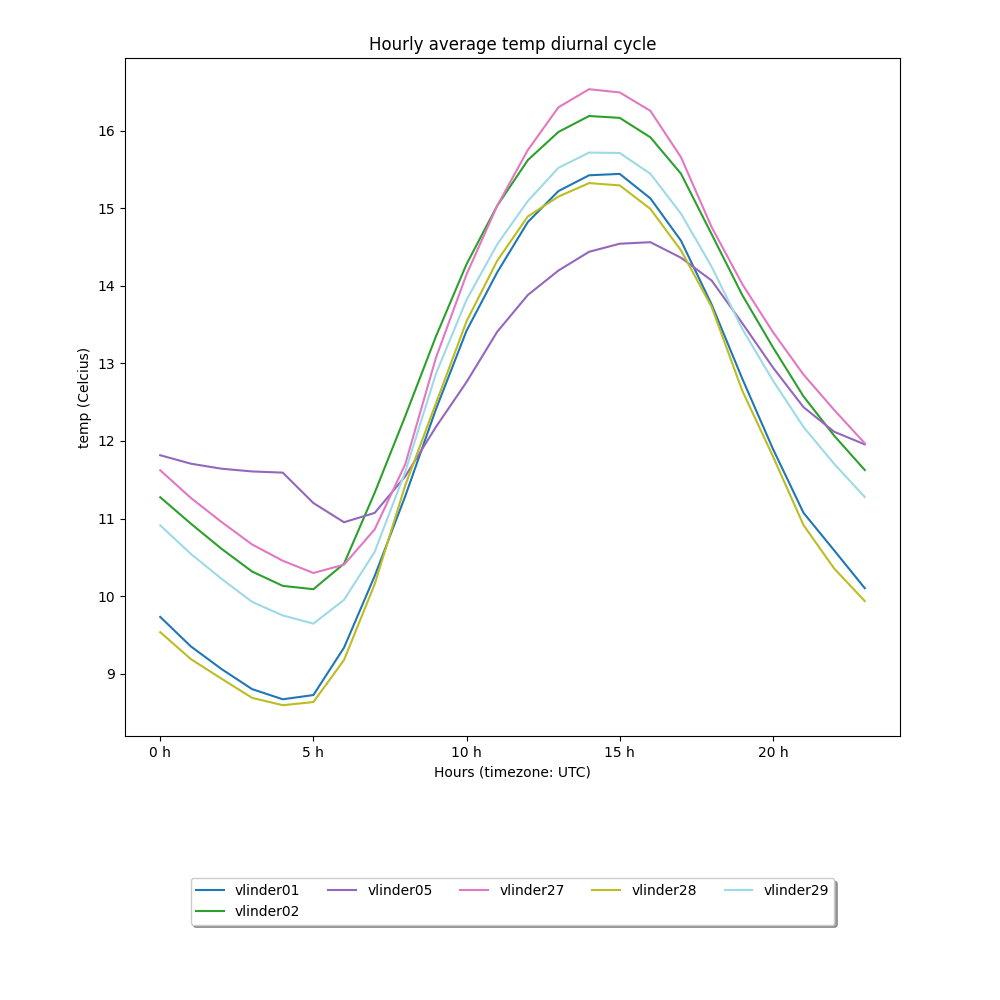

In [ ]:
#create Analysis instance
analysis = your_dataset.get_analysis()
# Create diurnal cycle (annual mean) and create plot
stats = analysis.get_diurnal_statistics(obstype='temp', # here you can change the varible for which you want to plot the diurnal cycle
                                        stations=None, # here you can select the stations you want to include, for example: stations=['vlinder01','vlinder02','vlinder25','vlinder27','vlinder28']
                                        startdt=None, # here you can change the start date and time
                                        enddt=None, # here you can change the end date and time
                                        plot=True, # create immediatly a plot, if false, then no plot is created
                                        colorby='name', # here you can change the color of the lines in the graph
                                        errorbands=False, # when you set this to True, then error bands are created around the curves based on the standard deviation
                                        )

This graph visualizes the diurnal cycle. Are there differences between the diurnal cycles of the stations? Try to explain them based on your knowledge of the measurement network. Are there differences between day and night e.g. lines closer together during the day and larger spread during the night? Try to come up with some hypotheses.

Similar as for the annual and seasonal statistics, it might be handy to comprise the things you see visually into numbers. The module `get_diurnal_statistics()` computes these statistics and outputs the graph when `plot=True`. The statistics are thus already saved in the `stats` object that you created in the code above.

In [ ]:
print(stats) # data behind the curves showed above

name  vlinder01  vlinder02  vlinder05  vlinder27  vlinder28  vlinder29
hour                                                                  
0      9.732692  11.274725  11.816209  11.622253   9.536264  10.912088
1      9.352486  10.934530  11.707182  11.265746   9.188950  10.545028
2      9.061157  10.610744  11.642700  10.956198   8.936915  10.223967
3      8.801928  10.317080  11.607163  10.666116   8.689532   9.926446
4      8.671350  10.132782  11.592011  10.456474   8.595041   9.751240
5      8.725895  10.089807  11.200000  10.298898   8.635537   9.646281
6      9.336915  10.418457  10.952617  10.405510   9.177686   9.952342
7     10.258953  11.331956  11.072727  10.860331  10.153719  10.570248
8     11.290331  12.321271  11.544475  11.700829  11.429834  11.603867
9     12.408011  13.346685  12.180663  13.071271  12.482873  12.866022
10    13.420661  14.278512  12.759504  14.147383  13.542424  13.818733
11    14.172452  15.030854  13.406887  15.030854  14.322039  14.533058
12    

The statistics contain for each station the hourly mean temperatures. You can easily extract the data you want using the following commands:

In [ ]:
# If your are intersted in one specific station, you can select that row:
overview_df = stats.unstack()
overview_df.loc['vlinder02']

hour
0     11.274725
1     10.934530
2     10.610744
3     10.317080
4     10.132782
5     10.089807
6     10.418457
7     11.331956
8     12.321271
9     13.346685
10    14.278512
11    15.030854
12    15.619008
13    15.982094
14    16.187293
15    16.163636
16    15.913223
17    15.444353
18    14.665289
19    13.880716
20    13.208242
21    12.574451
22    12.068132
23    11.625549
dtype: float64

If your data set contains multiple seasons, then it might be interesting to see how the diurnal cycle changes over the different seasons. To visualize this, you need to aggregate the observations **per station** and **per season**. For these more complex aggregation schemes you can use the [get_aggregated_cycle_statistics()](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.analysis.Analysis.html#metobs_toolkit.analysis.Analysis.get_aggregated_cycle_statistics) method.

The arguments are similar to the [get_diurnal_statistics()](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.analysis.Analysis.html#metobs_toolkit.analysis.Analysis.get_aggregated_cycle_statistics) method, but with more flexibility:

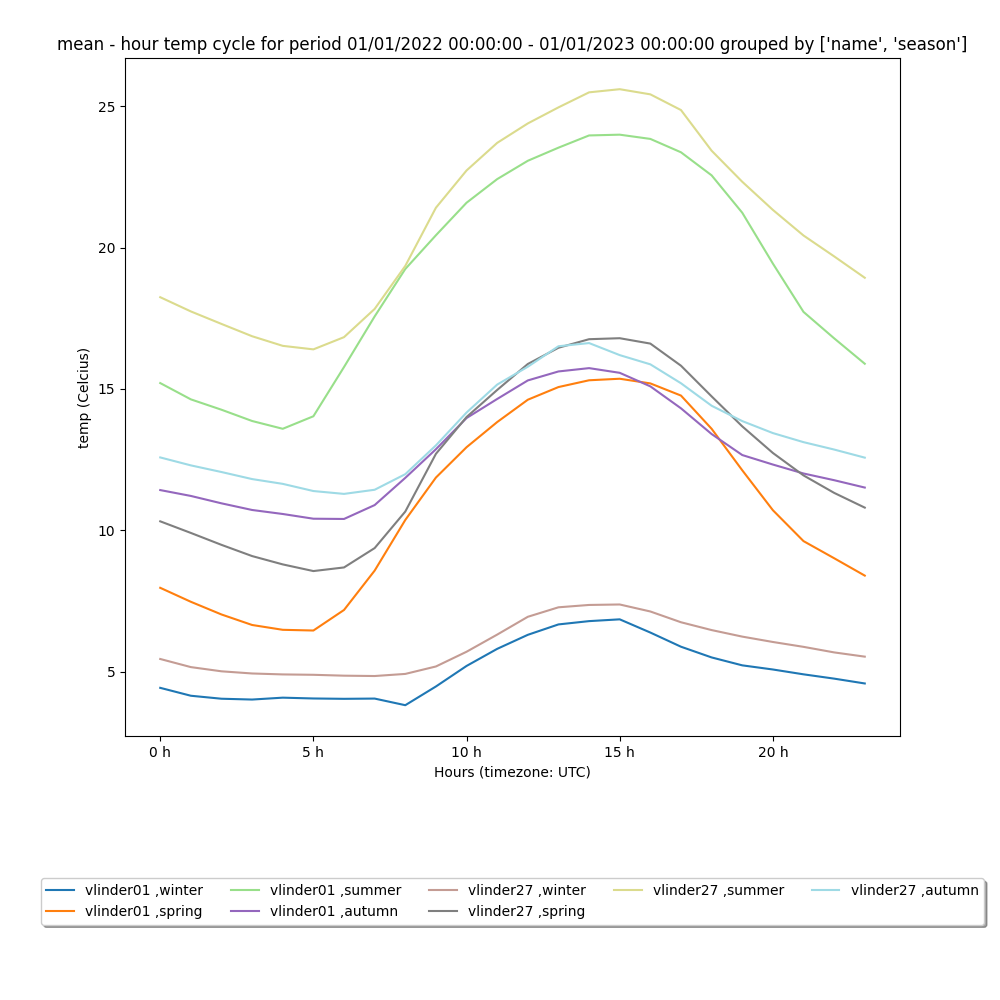

In [ ]:
# Create diurnal cycle for different seasons
# Change the station names to make this code work!
stats = analysis.get_aggregated_cycle_statistics(
              obstype='temp', # here you can change the varible for which you want to plot the diurnal cycle
              aggregation = ['name', 'season'], #each line is a unique combination of all these values
              aggregation_method = 'mean', #how the values are computed
              horizontal_axis = 'hour', #whicht time -aggregation will be presented on the horizontal axis ( 'hour', 'month', 'week_of_year', 'year', ...)
              stations= ['vlinder01', 'vlinder27'], # here you can select the stations you want to include, for example: stations=['vlinder01','vlinder02','vlinder25','vlinder27','vlinder28']
              startdt= None, # here you can change the start date and time
              enddt= None, # here you can change the end date and time
              plot=True, # create immediatly a plot, if false, then no plot is created
              errorbands=False, # when you set this to True, then error bands are created around the curves based on the standard deviation
)




In [ ]:
stats

vlinder01 ,winter  vlinder01 ,spring  vlinder01 ,summer  \
hour                                                            
0              4.423077           7.961957          15.205556   
1              4.143333           7.467391          14.628889   
2              4.037778           7.018478          14.262222   
3              4.008889           6.646739          13.863333   
4              4.075556           6.476087          13.587778   
5              4.046667           6.451087          14.031111   
6              4.034444           7.178261          15.773333   
7              4.043333           8.570652          17.563333   
8              3.808889          10.361957          19.241573   
9              4.471111          11.862637          20.434444   
10             5.197778          12.935870          21.585556   
11             5.802222          13.826087          22.421111   
12             6.298889          14.616304          23.070000   
13             6.666667          15.064130          23.533333   
14             6.783333          15.304348          23.966292   
15             6.846667          15.358696          23.993333   
16             6.378889          15.193478          23.843333   
17             5.877778          14.763043          23.370000   
18             5.498889          13.588043          22.554444   
19             5.218889          12.120652          21.232222   
20             5.072222          10.707609          19.432967   
21             4.901111           9.614130          17.723077   
22             4.748889           9.008696          16.789011   
23             4.577778           8.393478          15.889011   

      vlinder01 ,autumn  vlinder27 ,winter  vlinder27 ,spring  \
hour                                                            
0             11.419780           5.443956          10.314130   
1             11.212222           5.156667           9.903261   
2             10.950549           5.007778           9.481522   
3             10.715385           4.931111           9.084783   
4             10.573626           4.897778           8.790217   
5             10.406593           4.884444           8.554348   
6             10.397802           4.853333           8.682609   
7             10.889011           4.841111           9.367391   
8             11.851648           4.915556          10.659783   
9             12.864835           5.178889          12.702198   
10            13.968132           5.700000          14.003261   
11            14.642857           6.306667          14.961957   
12            15.298901           6.936667          15.880435   
13            15.616484           7.272222          16.454348   
14            15.734066           7.355556          16.757609   
15            15.568132           7.372222          16.792391   
16            15.089011           7.124444          16.602174   
17            14.312088           6.743333          15.819565   
18            13.402198           6.466667          14.734783   
19            12.659341           6.235556          13.673913   
20            12.323077           6.045556          12.732609   
21            12.006593           5.873333          11.939130   
22            11.769231           5.676667          11.320652   
23            11.508791           5.526667          10.798913   

      vlinder27 ,summer  vlinder27 ,autumn  
hour                                        
0             18.243333          12.574725  
1             17.740000          12.293333  
2             17.297778          12.058242  
3             16.862222          11.808791  
4             16.522222          11.639560  
5             16.397778          11.385714  
6             16.830000          11.284615  
7             17.828889          11.430769  
8             19.350562          11.982418  
9             21.408889          13.000000  
10            22.726667          14.162637  
11            23.703333          15.151

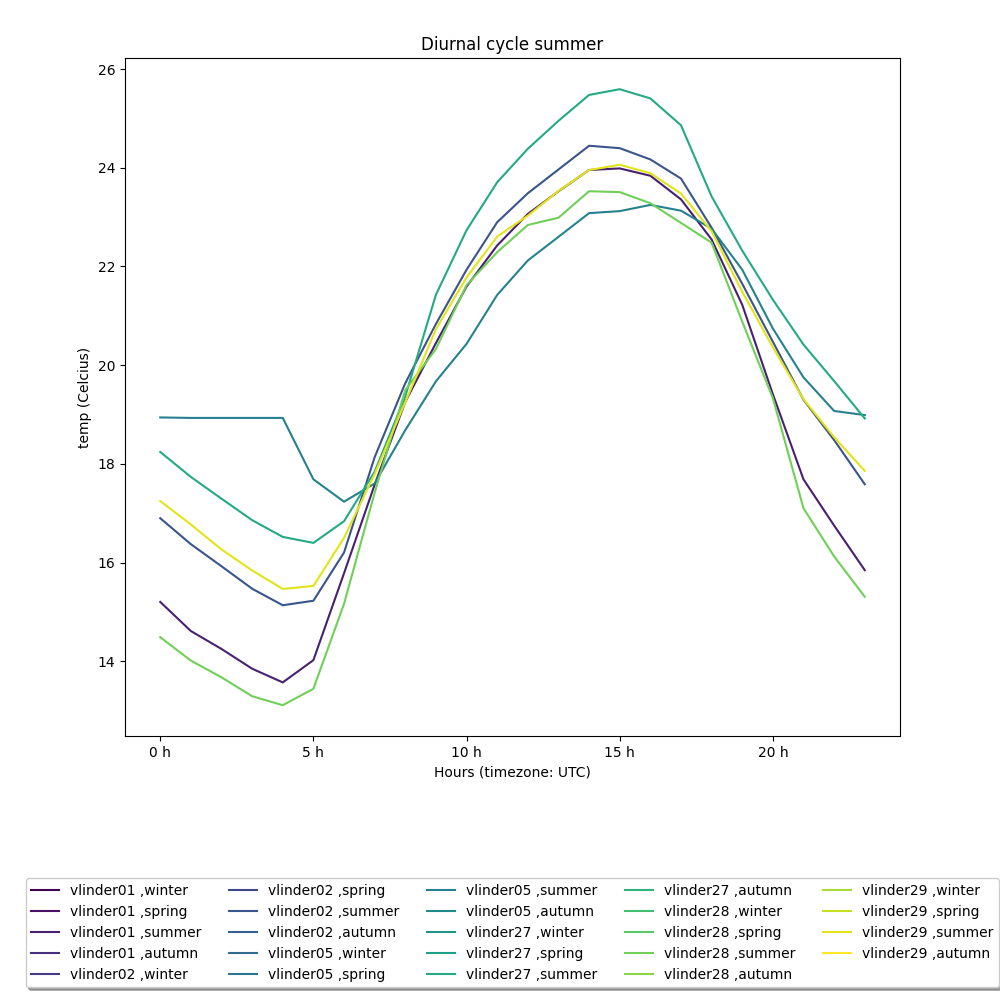

In [ ]:
# If you only want one season e.g. meteorological summer (June, July, August),
# then set the startdt and enddt
stats = analysis.get_aggregated_cycle_statistics(
              obstype='temp', # here you can change the varible for which you want to plot the diurnal cycle
              aggregation = ['name', 'season'], #each line is a unique combination of all these values
              aggregation_method = 'mean', #how the values are computed
              horizontal_axis = 'hour', #whicht time -aggregation will be presented on the horizontal axis ( 'hour', 'month', 'week_of_year', 'year', ...)
              stations= None, # here you can select the stations you want to include, for example: stations=['vlinder01','vlinder02','vlinder25','vlinder27','vlinder28']
              startdt= datetime(2022,6,1), # here you can change the start date and time
              enddt= datetime(2022,8,31), # here you can change the end date and time
              plot=True, # create immediatly a plot, if false, then no plot is created
              errorbands=False, # when you set this to True, then error bands are created around the curves based on the standard deviation
              legend=True,
              title='Diurnal cycle summer'
              )

Look at the differences between the stations and try to explain it based on your knowledge of the measurement network. Do the diurnal cycles change for the different seasons? Can you explain this?

Depending on the location of your measurment network, the time of sunrise and sunset can fluctuate during the year. This has to be taken into account when investigating day- and nighttime differences. To see this effect, it might be interesting to compare your results with someone who has data of a network more north, south, east or west. Can you explain the shift in the graphs based on the geographical location?

**4.1.5 The urban heat island**

The [get_diurnal_statistics_with_reference()](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.analysis.Analysis.html#metobs_toolkit.analysis.Analysis.get_diurnal_statistics_with_reference) method creates a graph with the diurnal cycle of the urban station(s) minus the rural reference station to get some insight in the UHI intensity at different locations in the city.

 In order to obtain the graph, you have to define a rural reference station. Select one rural reference station, when there are multiple rural reference stations. If there is no rural station within your network, then select the station you want to compare the other stations to.



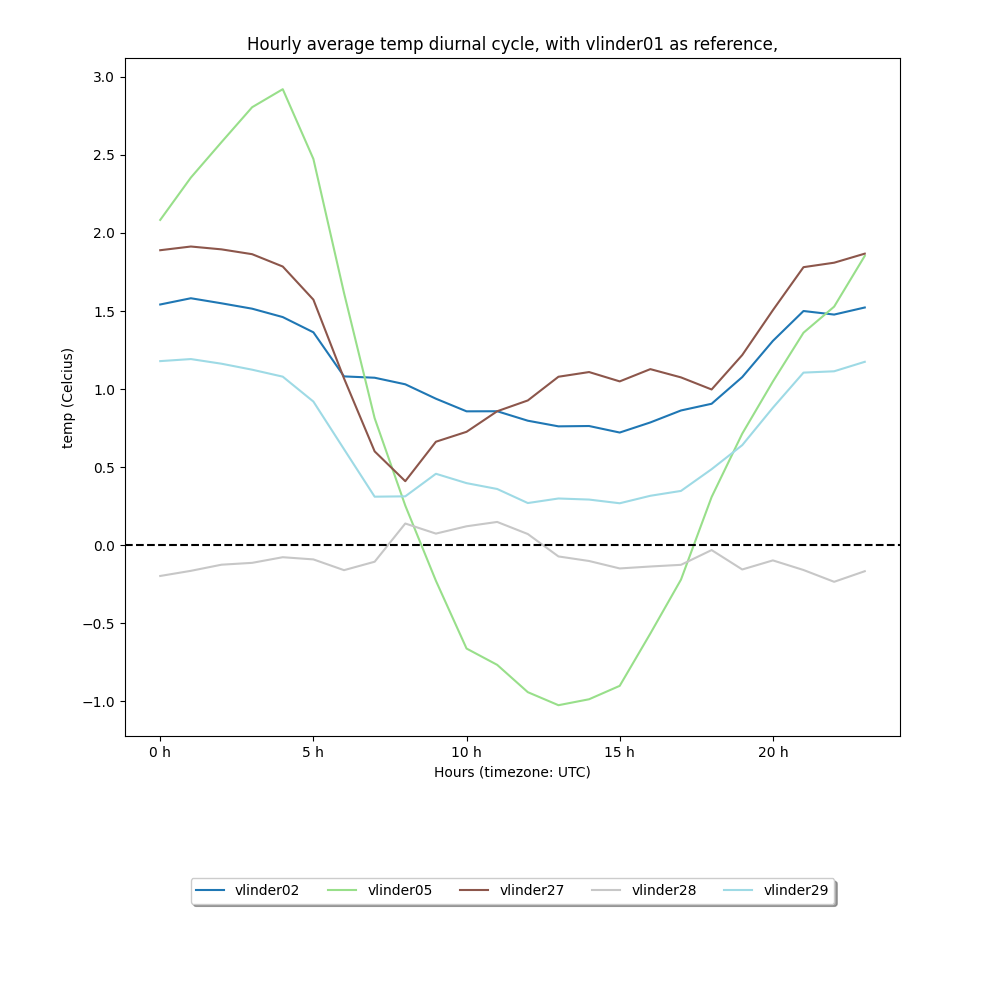

In [ ]:
analysis = your_dataset.get_analysis()
stats = analysis.get_diurnal_statistics_with_reference(
                obstype='temp',
                refstation='vlinder01', # define a (rural) reference station of your dataset, insert the name here
                colorby='name', #'name' or 'lcz'
                tolerance='20T', # (=20 minutes) An obsevation difference can only be made if the maximum time difference to the reference is less then the tolerance.
                stations=None, # here you can select the stations you want to include, for example: stations=['vlinder01','vlinder02','vlinder25','vlinder27','vlinder28'], #if None then all stations are selected
                startdt=None,
                enddt=None,
                plot=True,
                errorbands=False, # standard deviation of both reference station and station included
                show_zero_horizontal=True, #Draw an origin line representing zero differences
                )


If there are multiple rural reference stations for an urban network, then you can investigate the above for each rural station seperatly or you can take the mean/meadian over the rural stations.

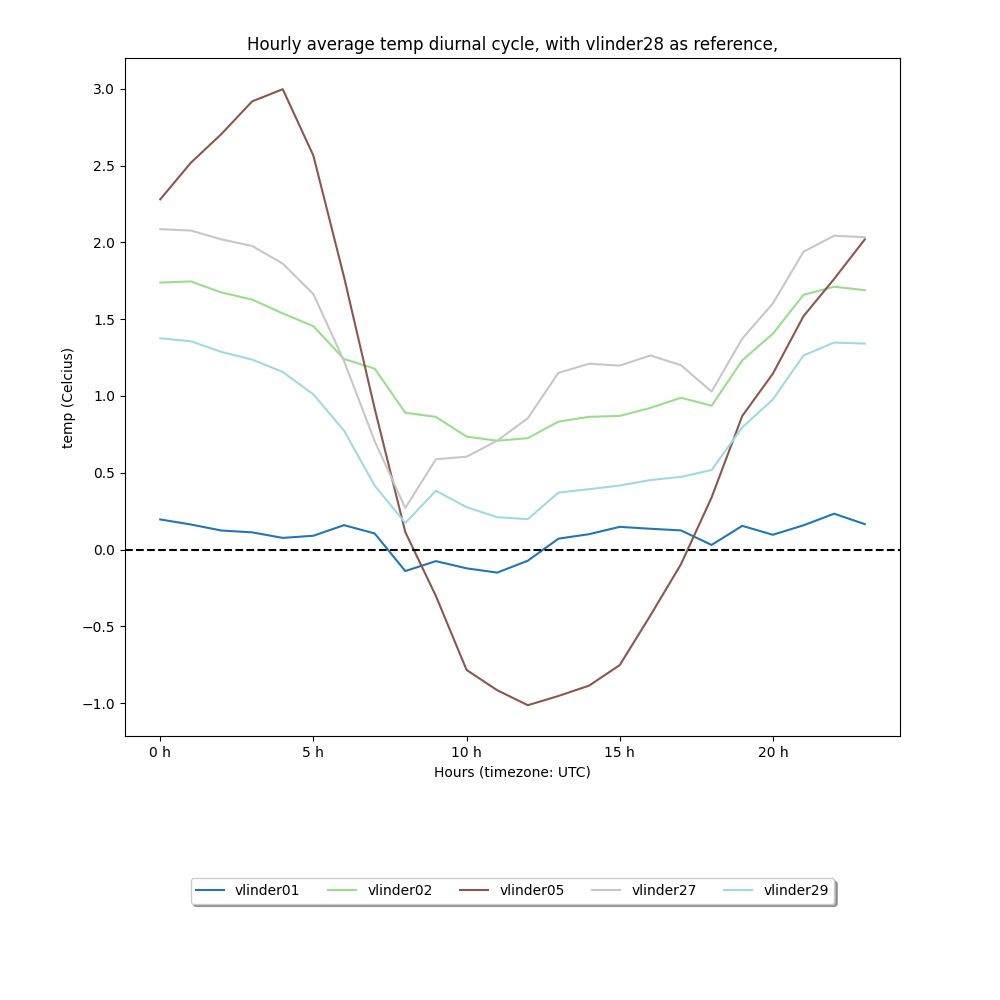

In [ ]:
# Same plot as above but with a different rural reference station
stats = analysis.get_diurnal_statistics_with_reference(
                obstype='temp',
                refstation='vlinder28', # define a (rural) reference station of your dataset, insert the name here
                colorby='name', #'name' or 'lcz'
                tolerance='20T', # (=20 minutes) An obsevation difference can only be made if the maximum time difference to the reference is less then the tolerance.
                stations=None, # here you can select the stations you want to include, for example: stations=['vlinder01','vlinder02','vlinder25','vlinder27','vlinder28'], #if None then all stations are selected
                startdt=None,
                enddt=None,
                plot=True,
                errorbands=False, # standard deviation of both reference station and station included
                show_zero_horizontal=True, #Draw an origin line representing zero differences
                )

Maybe you want to know how intense the UHI is on average at a particular time of the day for a particular station. You can compute this with the following code.

name  vlinder01  vlinder27  urban-rural
hour                                   
0      9.732692  11.622253     1.889560
1      9.352486  11.265746     1.913260
2      9.061157  10.956198     1.895041
3      8.801928  10.666116     1.864187
4      8.671350  10.456474     1.785124
5      8.725895  10.298898     1.573003
6      9.336915  10.405510     1.068595
7     10.258953  10.860331     0.601377
8     11.290331  11.700829     0.410497
9     12.408011  13.071271     0.663260
10    13.420661  14.147383     0.726722
11    14.172452  15.030854     0.858402
12    14.821212  15.748760     0.927548
13    15.220386  16.299725     1.079339
14    15.423481  16.532873     1.109392
15    15.441598  16.491185     1.049587
16    15.126446  16.254545     1.128099
17    14.580992  15.656198     1.075207
18    13.758953  14.756749     0.997796
19    12.803581  14.022039     1.218457
20    11.899451  13.404945     1.505495
21    11.074176  12.855220     1.781044
22    10.590659  12.400275     1.809615


<Axes: xlabel='hour'>

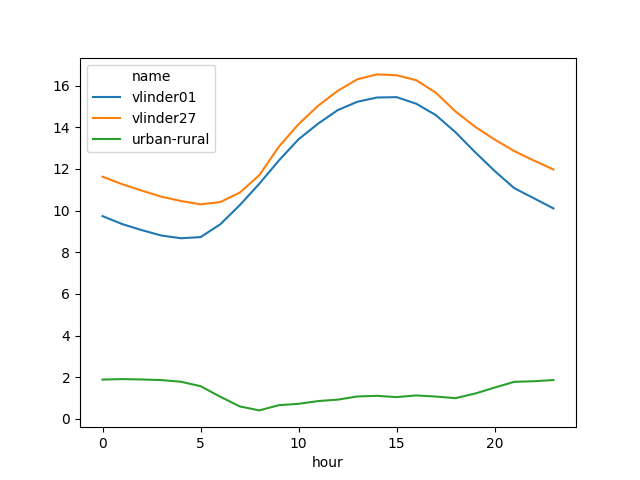

In [ ]:
# Code to get the UHI intensity expressed in numbers
analysis = your_dataset.get_analysis()
stations_of_interest = ['vlinder01', #Rural: 7km from Gent
                        'vlinder27'] #Urban: Gent city center

stats = analysis.get_diurnal_statistics(obstype='temp',
                                        stations=stations_of_interest,
                                        startdt=None,
                                        enddt=None,
                                        plot=False,
                                        colorby='name',
                                        errorbands=False,
                                        )
stats['urban-rural'] = stats['vlinder27'] - stats['vlinder01']

print(stats)
#or make a basic plot
stats.plot()

What is the largest difference between stations or UHI intensity measured by your network? When did it occur? Did you find some interesting aspects about the UHI in your study region? Can you explain the figures that you produced?

### **4.2 Applying other datasets to interpret the urban climate data**

**4.2.1 Generalizing the data along the local climate zone classification**

Maybe you have a large amount of measurment locations, which causes that the above information is cluttered and difficult to draw general conclusions. By aggregating the information per local climate zone (LCZ), you might get wiser. If you have a limited amount of stations, then this classification might help you to understand or interpret the outcomes better since the LCZ gives us an indication of the urban characteristics at neighborhood scale.
More information about the LZC classification can be found [here](https://doi.org/10.1175/BAMS-D-11-00019.1).

Figure by [Demuzere et al. (2020)](https://doi.org/10.1038/s41597-020-00605-z)
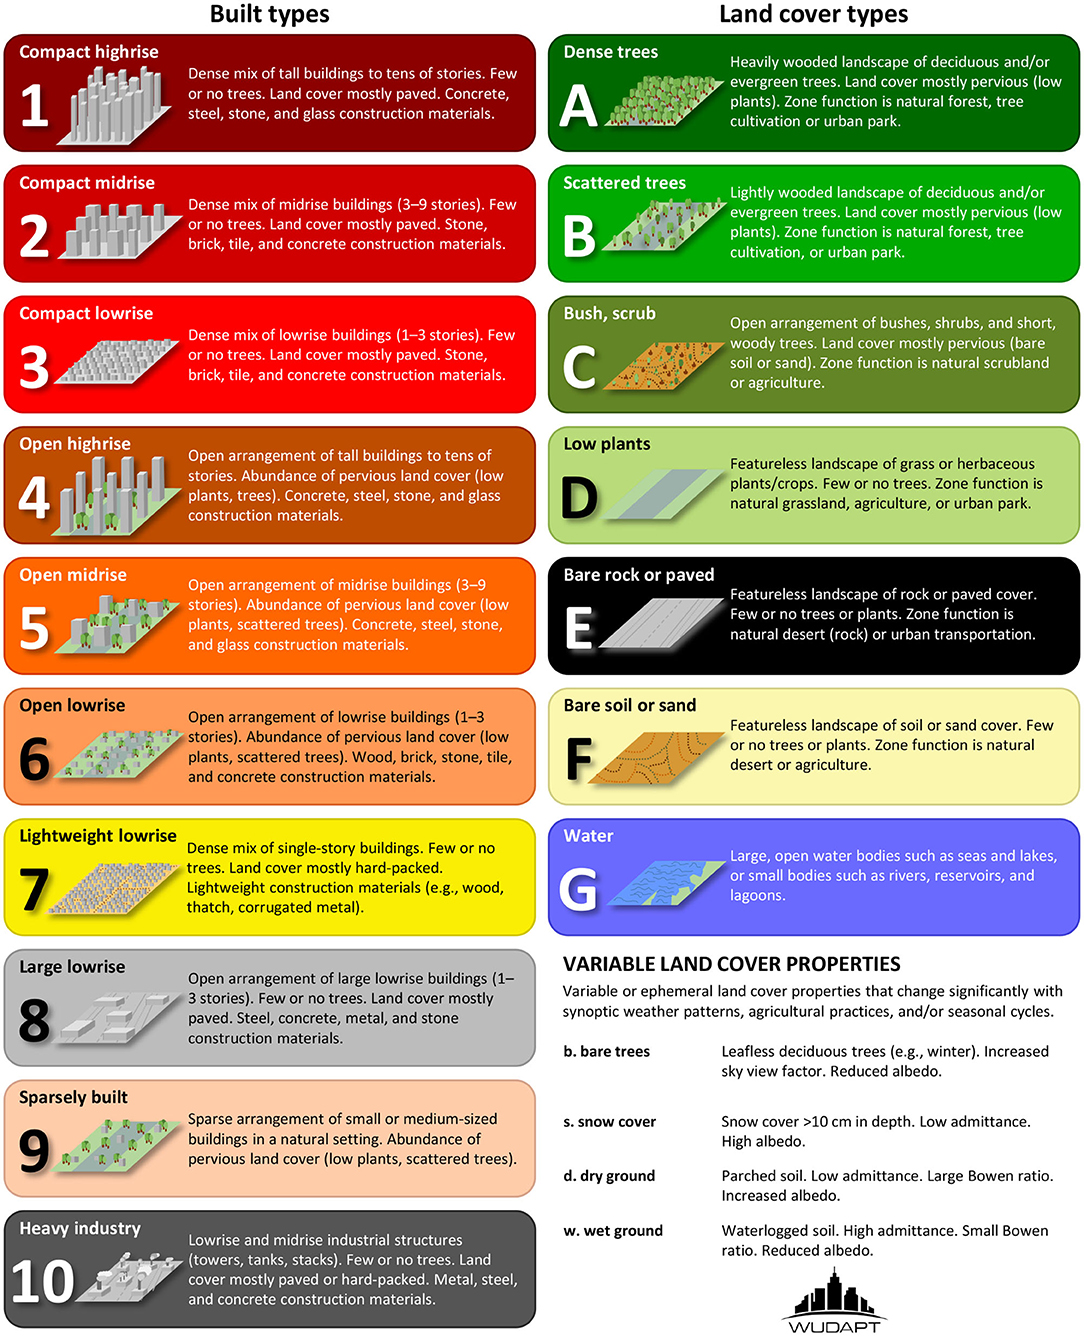

In the following section we will extract the land cover data from the google earth engine. The following function needs to be run before we can move on as this also updates the metafile. You can implement multiple buffer radii to see what the impact of them are on the temperature.

In [ ]:
LC = your_dataset.get_landcover(buffers=[500,250,100, 50], #buffer radius in m
                           aggregate=True, #agregate landcoverfractions to water, green and impervious fractions
                           overwrite=True, #will overwrite if there were already calculated values.
                           #gee_map='worldcover', #chose which dataset to use. Do not change this
                          )
LC.head(4)
# The landcover fractions are also present in the .metadf
your_dataset.metadf


INFO:metobs_toolkit.dataset:Extracting landcover from worldcover with buffer radius = 500
INFO:metobs_toolkit.landcover_functions:Using aggregation scheme: {'water': [70, 80, 90, 95], 'pervious': [10, 20, 30, 40, 60, 100], 'impervious': [50]}
INFO:metobs_toolkit.dataset:Extracting landcover from worldcover with buffer radius = 250
INFO:metobs_toolkit.landcover_functions:Using aggregation scheme: {'water': [70, 80, 90, 95], 'pervious': [10, 20, 30, 40, 60, 100], 'impervious': [50]}
INFO:metobs_toolkit.dataset:Extracting landcover from worldcover with buffer radius = 100
INFO:metobs_toolkit.landcover_functions:Using aggregation scheme: {'water': [70, 80, 90, 95], 'pervious': [10, 20, 30, 40, 60, 100], 'impervious': [50]}
INFO:metobs_toolkit.dataset:Extracting landcover from worldcover with buffer radius = 50
INFO:metobs_toolkit.landcover_functions:Using aggregation scheme: {'water': [70, 80, 90, 95], 'pervious': [10, 20, 30, 40, 60, 100], 'impervious': [50]}


network        lat       lon  call_name  location  \
name                                                           
vlinder01  vlinder  50.980438  3.815763        NaN       NaN   
vlinder02  vlinder  51.022379  3.709695        NaN       NaN   
vlinder05  vlinder  51.052655  3.675183        NaN       NaN   
vlinder27  vlinder  51.058080  3.728000        NaN       NaN   
vlinder28  vlinder  51.043500  3.791667        NaN       NaN   
vlinder29  vlinder  51.088643  3.789441        NaN       NaN   

                           geometry assumed_import_frequency  \
name                                                           
vlinder01  POINT (3.81576 50.98044)          0 days 00:05:00   
vlinder02  POINT (3.70969 51.02238)          0 days 00:05:00   
vlinder05  POINT (3.67518 51.05266)          0 days 00:05:00   
vlinder27  POINT (3.72800 51.05808)          0 days 00:05:00   
vlinder28  POINT (3.79167 51.04350)          0 days 00:05:00   
vlinder29  POINT (3.78944 51.08864)          0 days 00:05:00   

          dataset_resolution  water_50m  pervious_50m  ...  water_100m  \
name                                                   ...               
vlinder01    0 days 01:00:00   0.000000      1.000000  ...    0.000000   
vlinder02    0 days 01:00:00   0.000000      0.643540  ...    0.000000   
vlinder05    0 days 01:00:00   0.831764      0.114271  ...    0.446604   
vlinder27    0 days 01:00:00   0.000000      0.000000  ...    0.000000   
vlinder28    0 days 01:00:00   0.000000      0.829442  ...    0.089327   
vlinder29    0 days 01:00:00   0.000000      0.286633  ...    0.000000   

           pervious_100m  impervious_100m                 lcz water_250m  \
name                                                                       
vlinder01       0.981781         0.018219  Low plants (LCZ D)   0.000000   
vlinder02       0.428769         0.571231        Open midrise   0.000000   
vlinder05       0.224871         0.328525       Water (LCZ G)   0.242406   
vlinder27       0.012496         0.987504     Compact midrise   0.015424   
vlinder28       0.647710         0.262963  Low plants (LCZ D)   0.145727   
vlinder29       0.310451         0.689549       Large lowrise   0.000000   

           pervious_250m  impervious_250m  water_500m  pervious_500m  \
name                                                                   
vlinder01       0.963635         0.036365    0.000243       0.905494   
vlinder02       0.535944         0.464056    0.054544       0.521441   
vlinder05       0.526977         0.230617    0.130023       0.748111   
vlinder27       0.084793         0.899783    0.010765       0.065590   
vlinder28       0.681235         0.173039    0.096463       0.698357   
vlinder29       0.338116         0.661884    0.019252       0.474298   

           impervious_500m  
name                        
vlinder01         0.094263  
vlinder02         0.424015  
vlinder05         0.121866  
vlinder27         0.923646  
vlinder28         0.205180  
vlinder29         0.506450  

[6 rows x 21 columns]

Now you can make diurnal plots where the color of the curve indicates the LCZ type. With this you can investigate how the diurnal cycle differs between different LCZs.

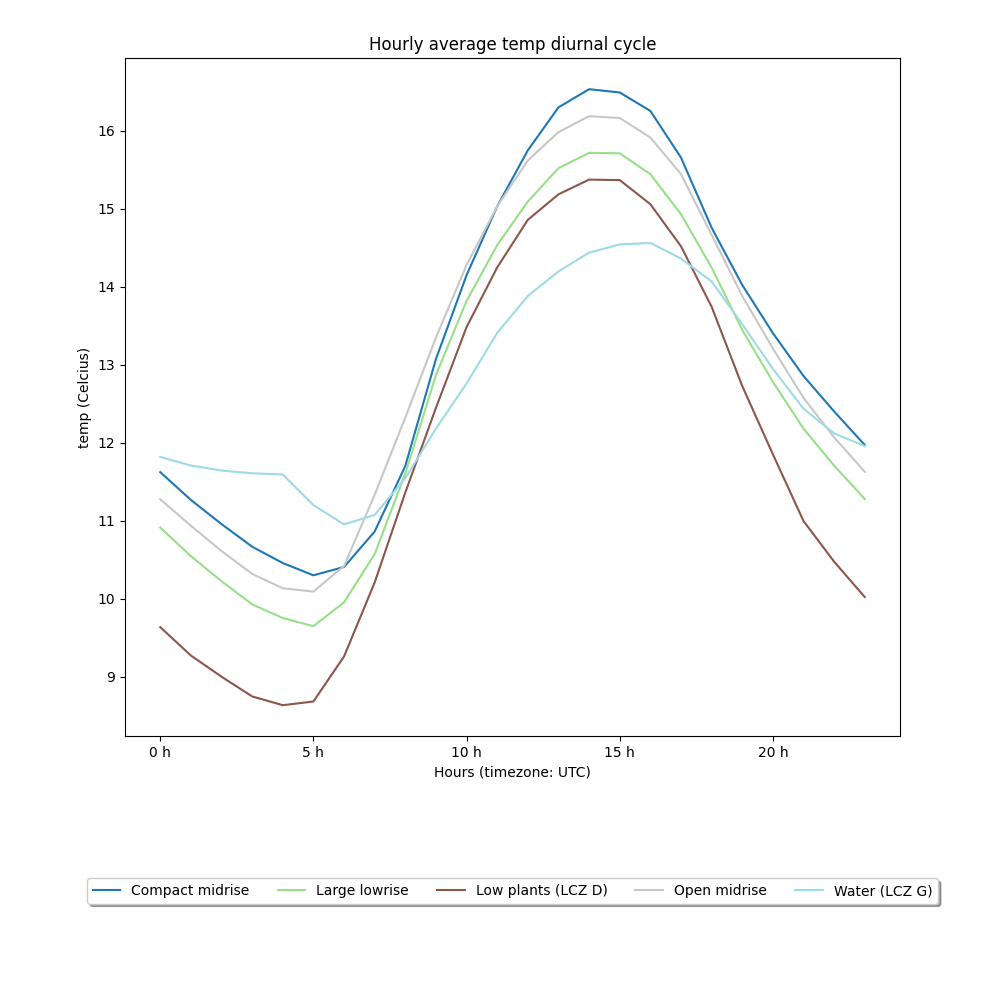

In [ ]:
your_dataset.get_lcz() # function to get the LCZ values for your stations
analysis = your_dataset.get_analysis()
stats = analysis.get_diurnal_statistics(obstype='temp',
                                        stations=None,
                                        startdt=None,
                                        enddt=None,
                                        plot=True,
                                        colorby='lcz', # lines represent lcz classes
                                        errorbands=False,
                                        )
# If you cange colorby='lcz' to colorby='name', then you will get the same
# graph as before in the diurnal cycle section.

**4.2.2 Influence of the land cover on the diurnal cycle and urban heat island**

More buildings and impervious area will lead to more trapping of the heat. It might thus be interesting to have a look how this influences the diurnal cycle and the UHI. In this section we will work with different buffer radii around the station(s) to see how the land cover is affecting the measured temperature.

First, you can create an interactive map to see which land cover surrounds the weather stations. This can be done by using the [make_gee_plot()](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.dataset.Dataset.html#metobs_toolkit.dataset.Dataset.make_gee_plot) method, be sure to [update the settings](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.dataset_settings_updater.Dataset.html#metobs_toolkit.dataset_settings_updater.Dataset.update_settings) such that there is an output directory present for your dataset. After running the command below an .html file will be created in the specified folder of your settings e.g. `content/drive/MyDrive/FAIRNESS_summerschool_23`. Download this file to your computer and dubble click on it to open the website and see the interactive map. You can zoom in to get more detail about the land cover around a particular station.


In [ ]:
your_dataset.make_gee_plot(
          gee_map = 'worldcover', # the background map (keep this as default world cover)
          show_stations = True, #show the stations on the map
          save = True) # saves the html file in your output
#note you should download the .html file and then open it

INFO:metobs_toolkit.dataset:Gee Map will be save at /content/drive/MyDrive/FAIRNESS_summerschool_23/gee_worldcover_figure.html


Gee Map will be save at /content/drive/MyDrive/FAIRNESS_summerschool_23/gee_worldcover_figure.html


With the following piece of code you can calculate the correlation between the stations and the landcover fractions at every hour. All the values for each combination are stored in a matrix.

In [ ]:
analysis = your_dataset.get_analysis()
LC_analysis = analysis.get_lc_correlation_matrices(obstype=['temp'], #by which variable
                                                   groupby_labels=['hour']) #by what timeframe
LC_analysis

{0: {'cor matrix':                      temp  water_50m  pervious_50m  impervious_50m  \
  temp             1.000000   0.075756     -0.130226        0.067996   
  water_50m        0.075756   1.000000     -0.440981       -0.404619   
  pervious_50m    -0.130226  -0.440981      1.000000       -0.642336   
  impervious_50m   0.067996  -0.404619     -0.642336        1.000000   
  water_100m       0.057542   0.979793     -0.363570       -0.466238   
  pervious_100m   -0.129534  -0.300679      0.956544       -0.717868   
  impervious_100m  0.098525  -0.210259     -0.759381        0.953287   
  water_250m       0.020555   0.832680     -0.214244       -0.492762   
  pervious_250m   -0.107795   0.008523      0.878319       -0.902203   
  impervious_250m  0.091970  -0.270296     -0.734634        0.979339   
  water_500m       0.024954   0.736111     -0.126917       -0.499277   
  pervious_500m   -0.083353   0.300567      0.687467       -0.957130   
  impervious_500m  0.073464  -0.401817     -0.6

To interpret these values, you visualise this with the correlation matrix for a specific hour. The Main row of interest is the first row (temp), where you can see what type of correlation there is between the land cover tupe and the temperature and this for taking into account the micro or local environment which depends on the buffer radius (small or large). The sign of the value determines wether the relationship is a direct link (e.g. increased impervious leading to higher temperature when value is positive) or an inverse link (increased pervious leading to lower temperature when value is negative). The closer the value is to 1 in magnitude, the better the relation can be represented as linear. A zero indicates that there is no correlation between the variable (temp) and land cover.

The *-stars represent the statistical signifincance of the correlation.  

*   ***: p < 0.001
*   **: p < 0.01
*   *: p < 0.05



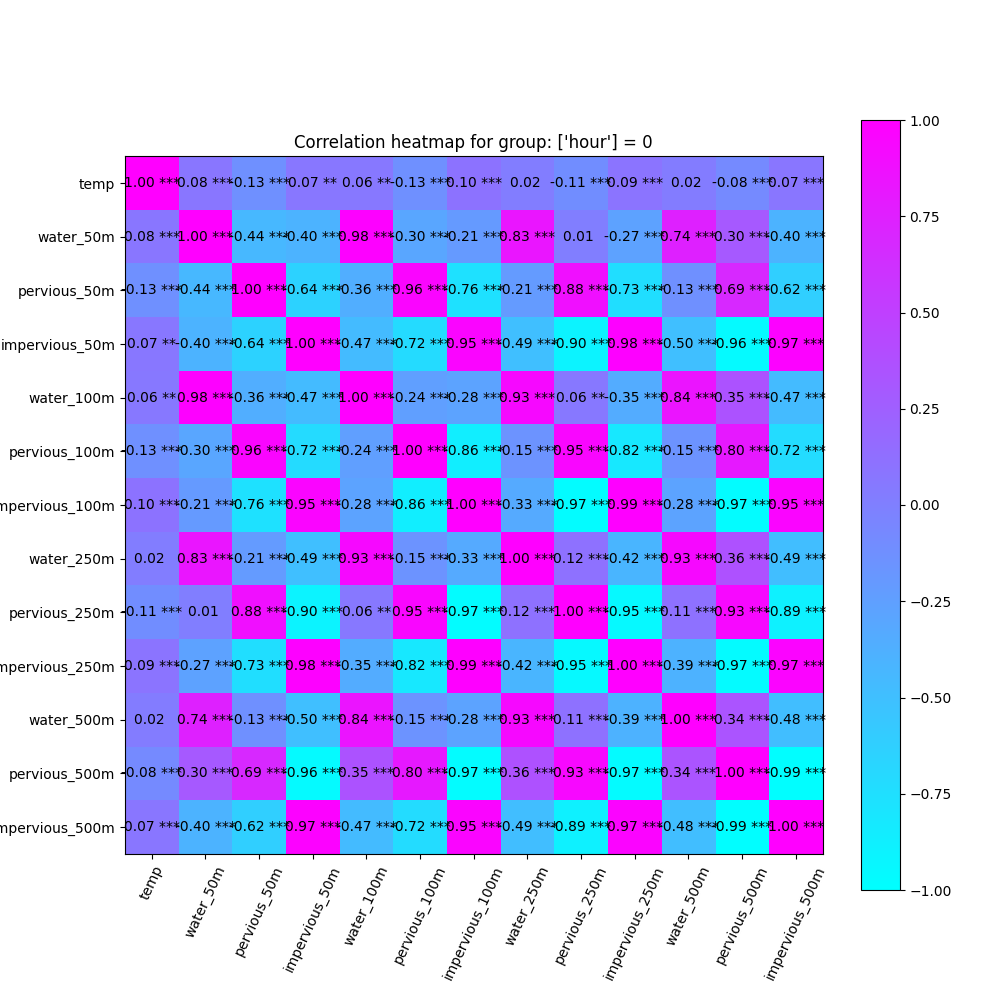

In [ ]:
analysis.plot_correlation_heatmap(groupby_value=0, title=None) # relationships at midnight

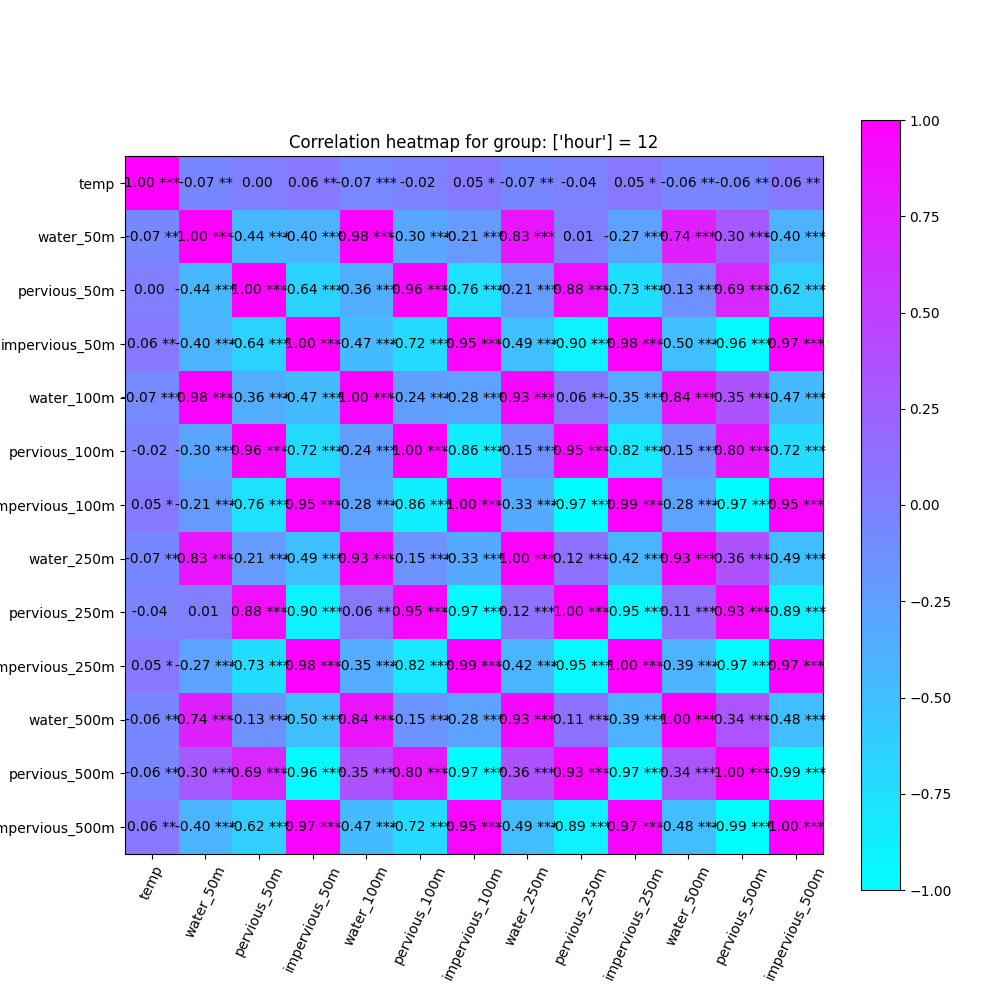

In [ ]:
analysis.plot_correlation_heatmap(groupby_value=12, title=None) # relationships at noon

To better understand how these dependancies between land cover and temperature behave during a diurnal cycle you can investigate the diurnal variation of these correlations.

 Here we not only plot these correlatio coeffecients but we also calculated how significantly different they are from 0 (using the p value). the smaller the p value the more significant the coefficient is not 0, meaning that the particular correlation between the landcover and temperature is actually meaningful and not just accidental.

/usr/local/lib/python3.10/dist-packages/metobs_toolkit/plotting_functions.py:863: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_scatter['p-value'] = plot_p_df[cor_name]
/usr/local/lib/python3.10/dist-packages/metobs_toolkit/plotting_functions.py:864: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_scatter['markers'] = pd.cut(x=to_scatter['p-value'],
/usr/local/lib/python3.10/dist-packages/metobs_toolkit/plotting_functions.py:863: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

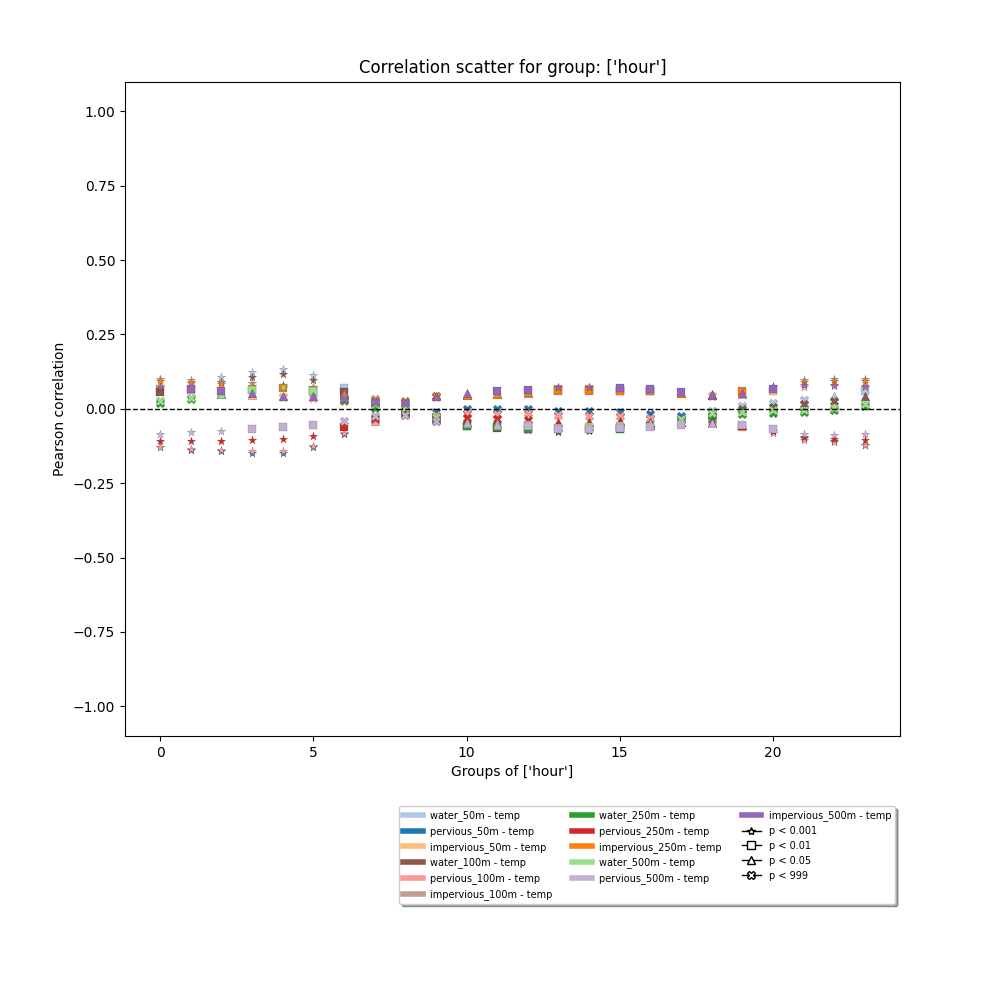

In [ ]:
analysis.plot_correlation_variation(title=None)

Try to interpret this graph. When does which land cover type have a direct/inderct link with temperature? Does the micro-environment influences the measured temperatures differently compared to the neighborhood scale? If so what could be the reason?

###**4.3 What happens if you didn't use QC and gap-filled data? (Challenge)**

Repeat some of the above investigations on your data with your initial dataset (no QC, nor gap-filling). Do you get (slightly) different results? How big is the impact?

In [ ]:
# Copy and adapt the code of the above sections here to investigate this yourself

### **4.4 What if we filter the data to specific meteorological events? (Challenge)**

Tip: You can use the [apply_filter()](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.analysis.Analysis.html#metobs_toolkit.analysis.Analysis.apply_filter) method for this.

In [ ]:
# Copy and adapt the code of the above sections here to investigate this yourself

### **4.5 Repeat the excercise for another variable in your data set (Challenge)**

In [ ]:
# Copy and adapt the code of the above sections here to investigate this yourself